# Pymaceuticals Inc.
---

### Analysis

* The study tested multiple drug regimens on mice to observe their impact on tumor volume over time. Capomulin and Ramicane showed the most consistent and effective results, with lower final tumor volumes and no outliers, indicating their potential as effective treatments. Infubinol had one potential outlier, suggesting variability in its effectiveness. 

* The overall mouse population was evenly split between male and female, ensuring balanced study results. Additionally, a positive correlation between mouse weight and average tumor volume was observed for the Capomulin regimen, suggesting that larger mice may have higher tumor volumes. The results highlight Capomulin and Ramicane as the most promising treatments, warranting further investigation.


In [101]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [102]:
# Checking the number of mice.
mouse_count = merged_data["Mouse ID"].nunique()
mouse_count

249

In [103]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicates[['Mouse ID', 'Timepoint']].drop_duplicates()

,Mouse ID,Timepoint
908,g989,0
910,g989,5
912,g989,10
914,g989,15
916,g989,20


In [104]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = merged_data[merged_data['Mouse ID'] == 'g989']
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [105]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data.drop(merged_data[merged_data['Mouse ID'] == 'g989'].index)

# Display the first few rows of the clean DataFrame
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [106]:
# Checking the number of mice in the clean DataFrame.
clean_count = clean_data["Mouse ID"].nunique()
clean_count

248

## Summary Statistics

In [107]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_stats = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean_Tumor_Volume='mean',
    Median_Tumor_Volume='median',
    Tumor_Volume_Variance='var',
    Tumor_Volume_Std_Dev='std',
    Tumor_Volume_Std_Error='sem'
).reset_index()
summary_stats

,Drug Regimen,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_Std_Error
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [108]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    var='var',
    std='std',
    sem='sem'
)

# Adjust the column layout to match the desired style
summary_stats.columns.name = "Tumor Volume (mm3)"

# Display the summary statistics table
summary_stats


Tumor Volume (mm3),mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

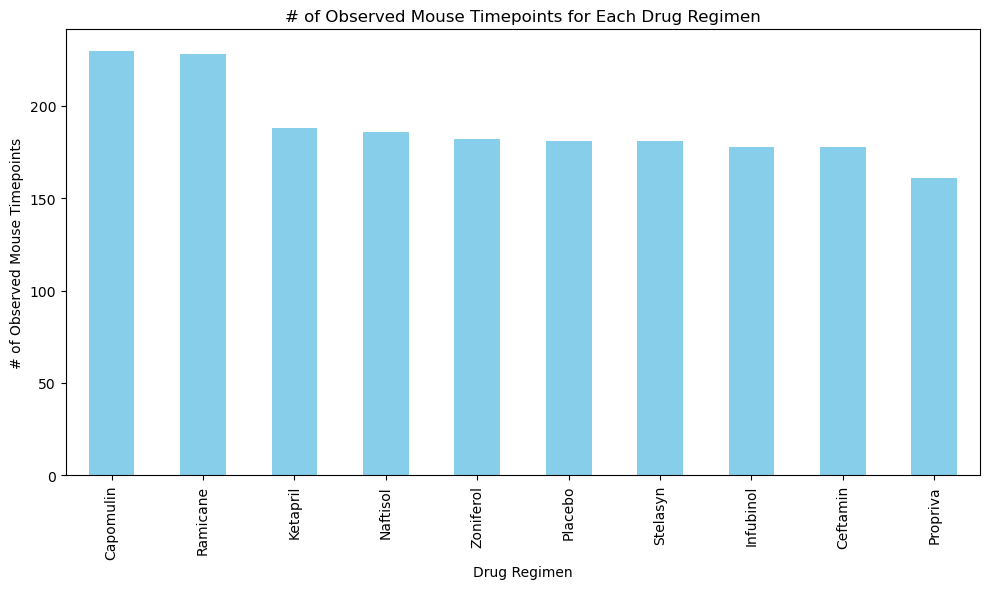

In [109]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint_counts = merged_data['Drug Regimen'].value_counts()

plt.figure(figsize=(10, 6))
timepoint_counts.plot(kind='bar', color='skyblue')
plt.title('# of Observed Mouse Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

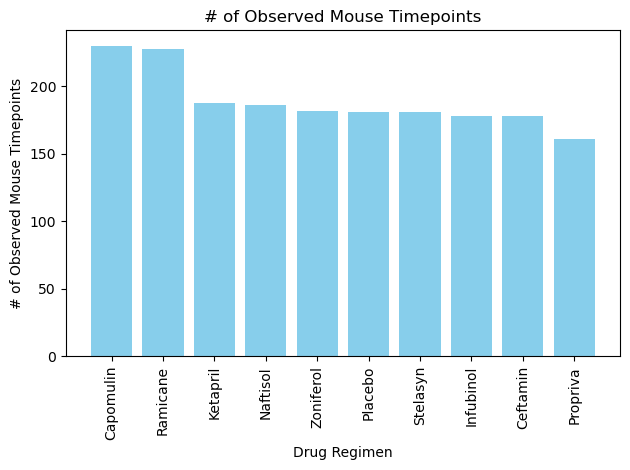

In [110]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Count the number of timepoints for each drug regimen
timepoint_counts = merged_data['Drug Regimen'].value_counts()

plt.bar(timepoint_counts.index, timepoint_counts.values, color='skyblue')
plt.title('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()


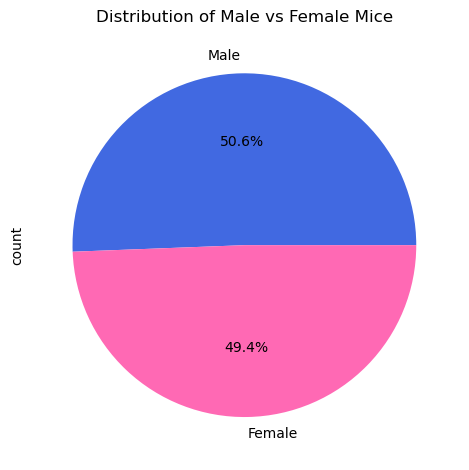

In [111]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_counts = merged_data["Sex"].value_counts()

gender_counts.plot.pie(
    autopct='%1.1f%%', 
    colors=['royalblue', 'hotpink'],  
    title='Distribution of Male vs Female Mice'
)
plt.tight_layout()
plt.show()

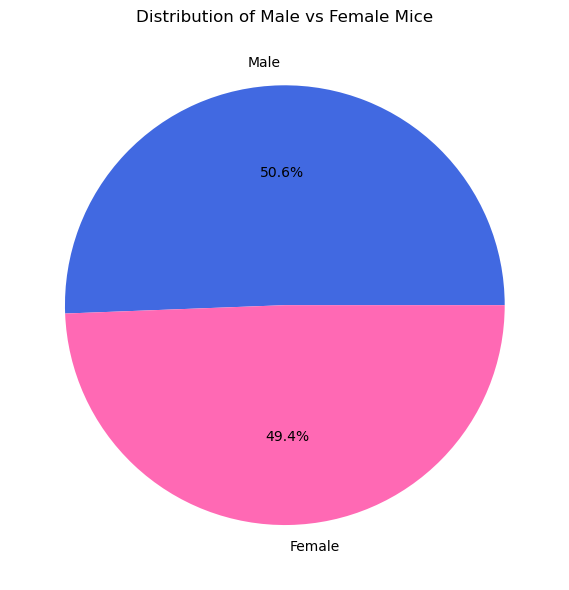

In [112]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_counts = merged_data["Sex"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    gender_counts.values, 
    labels=gender_counts.index, 
    autopct='%1.1f%%',    
    colors=['royalblue', 'hotpink']  
)
plt.title('Distribution of Male vs Female Mice')
plt.tight_layout()
plt.show()


## Quartiles, Outliers and Boxplots

In [113]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = merged_data[merged_data['Drug Regimen'].isin(selected_regimens)]

# Get the last (greatest) timepoint for each mouse
last_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints, filtered_data, on=['Mouse ID', 'Timepoint'], how='left')
final_tumor_volume.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [114]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through each treatment to calculate IQR and determine potential outliers
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volumes = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Add subset to the list
    tumor_vol_data.append(final_tumor_volumes)
    
    # Calculate the IQR
    quartiles = final_tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Calculate the lower and upper bounds for outliers
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Determine outliers using the bounds (keep original index)
    outliers = final_tumor_volumes[(final_tumor_volumes < lower_bound) | (final_tumor_volumes > upper_bound)]
    
    # Print the potential outliers for each treatment
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\susov\AppData\Local\Temp\ipykernel_19652\3008828125.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


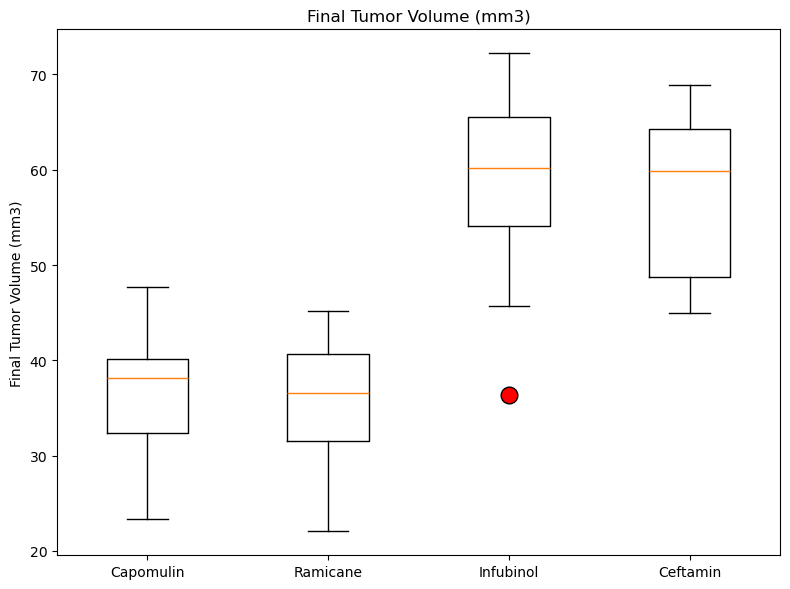

In [115]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_data = merged_data[merged_data['Drug Regimen'].isin(selected_regimens)]

# Get the final tumor volume for each mouse
final_tumor_volume = final_tumor_data.groupby(['Drug Regimen', 'Mouse ID'])['Tumor Volume (mm3)'].last().reset_index()

# Separate the data by regimen
capomulin = final_tumor_volume[final_tumor_volume['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane = final_tumor_volume[final_tumor_volume['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol = final_tumor_volume[final_tumor_volume['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin = final_tumor_volume[final_tumor_volume['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

plt.figure(figsize=(8, 6))
plt.boxplot(
    [capomulin, ramicane, infubinol, ceftamin],
    labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'],
    flierprops=dict(marker='o', markerfacecolor='red', markersize=12)  
)
plt.title('Final Tumor Volume (mm3)')
plt.ylabel('Final Tumor Volume (mm3)')
plt.tight_layout()
plt.show()

## Line and Scatter Plots

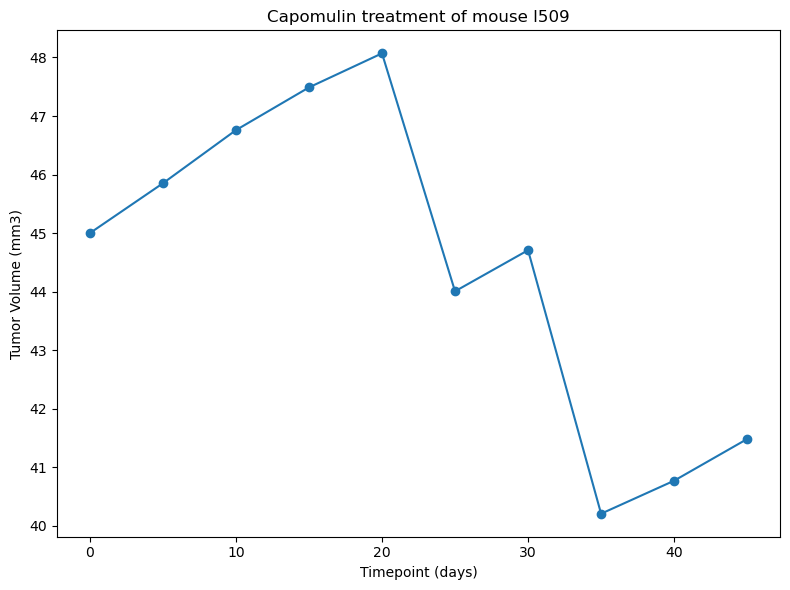

In [116]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter the data for mouse I509 under the Capomulin regimen
mouse_data = merged_data[(merged_data['Drug Regimen'] == 'Capomulin') & (merged_data['Mouse ID'] == 'l509')]

plt.figure(figsize=(8, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.tight_layout()
plt.show()


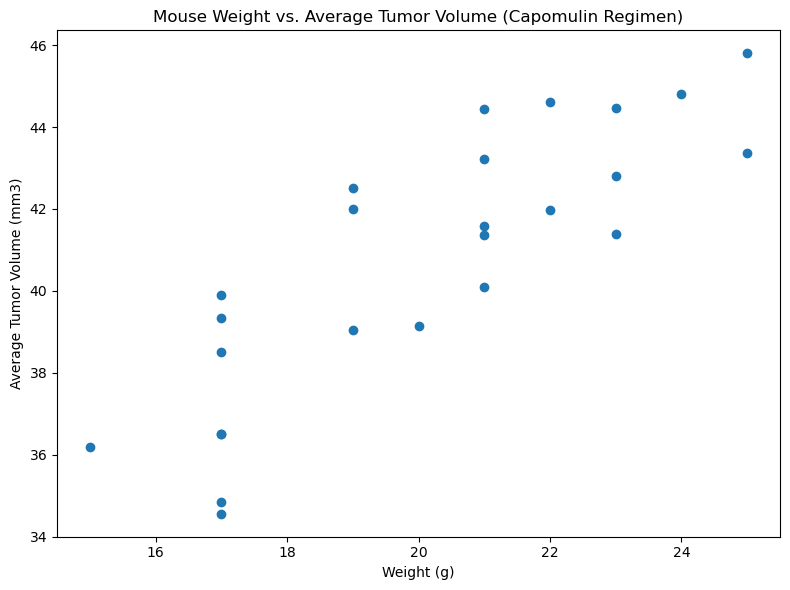

In [117]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID and calculate the average tumor volume
avg_tumor_volume = capomulin_data.groupby('Mouse ID')[['Weight (g)', 'Tumor Volume (mm3)']].mean()

plt.figure(figsize=(8, 6))
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.tight_layout()
plt.show()


## Correlation and Regression

Correlation Coefficient: 0.84


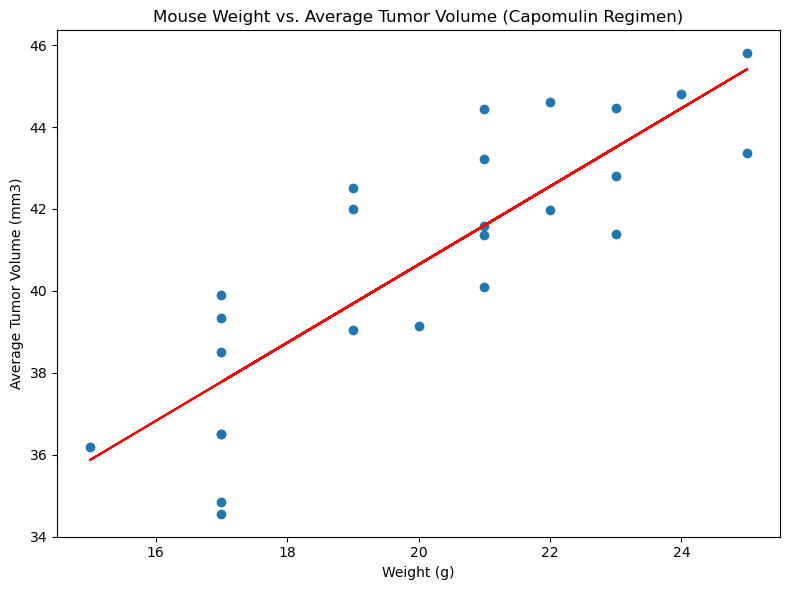

In [118]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID to get average weight and tumor volume
avg_tumor_volume = capomulin_data.groupby('Mouse ID').mean(numeric_only=True)

# Calculate the correlation coefficient
correlation = np.corrcoef(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])[0, 1]
print(f"Correlation Coefficient: {correlation:.2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])

# Generate the regression line values
regression_values = avg_tumor_volume['Weight (g)'] * slope + intercept

plt.figure(figsize=(8, 6))
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'], marker='o')
plt.plot(avg_tumor_volume['Weight (g)'], regression_values, color='red')  # Regression line
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.tight_layout()
plt.show()